In [106]:
"""
Data Dictionary
Variable

survival
Survival
0 = No, 1 = Yes

pclass
Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd

sex
Sex

Age
Age in years

sibsp
# of siblings / spouses aboard the Titanic

parch
# of parents / children aboard the Titanic

ticket
Ticket number

fare
Passenger fare

cabin
Cabin number

embarked
Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nData Dictionary\nVariable\nDefinition\nKey\nsurvival\nSurvival\n0 = No, 1 = Yes\npclass\nTicket class\n1 = 1st, 2 = 2nd, 3 = 3rd\nsex\nSex\n\nAge\nAge in years\n\nsibsp\n# of siblings / spouses aboard the Titanic\n\nparch\n# of parents / children aboard the Titanic\n\nticket\nTicket number\n\nfare\nPassenger fare\n\ncabin\nCabin number\n\nembarked\nPort of Embarkation\nC = Cherbourg, Q = Queenstown, S = Southampton\n'

# validationの工夫

In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
forest = RandomForestClassifier()
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train["cha"] = 0
df_test["cha"] = 1
df_train["Sex"] = le.fit_transform(df_train["Sex"])
df_test["Sex"] = le.fit_transform(df_test["Sex"])
s = pd.get_dummies(df_train["Embarked"])
df_train = pd.merge(df_train,s,right_index=True,left_index=True)
s = pd.get_dummies(df_test["Embarked"])
df_test = pd.merge(df_test,s,right_index=True,left_index=True)
df_train = df_train.iloc[:,2:]
df_test = df_test.iloc[:,1:]
print(df_train.columns)
print(df_test.columns)
print(df_train.head())

df_cha = pd.concat([df_train,df_test],axis=0)
df_cha["Embarked"].fillna("S",inplace=True)
print(df_cha.shape)
print(df_cha.isnull().sum())
print(df_cha.groupby(["Embarked"]).sum())
a = ["Pclass","Sex","Age","SibSp","Parch","Fare","S","Q","C"]
X_cha = df_cha.ix[:,a]
y_cha = df_cha["cha"]
X_cha["Age"].fillna(X_cha.Age.mean(),inplace=True)
X_cha["Fare"].fillna(X_cha.Fare.mean(),inplace=True)
print(X_cha.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X_cha, y_cha, test_size = 0.3)
forest.fit(X_train, y_train)
print(X_train.head())
print(X_train.shape)
print(y_train.shape)
print(accuracy_score(y_true=y_train, y_pred=forest.predict(X_train)))
print(accuracy_score(y_true=y_test, y_pred=forest.predict(X_test)))

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
   Pclass                                               Name  Sex   Age  \
0       3                            Braund, Mr. Owen Harris    1  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2       3                             Heikkinen, Miss. Laina    0  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4       3                           Allen, Mr. William Henry    1  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  cha  C  Q  S  
0      1      0         A/5 21171   7.2500   NaN        S    0  0  0  1  
1      1      0          PC 17599  71.2833   C85        C    0  1  0  0  
2      0      0  STON/O2. 31012

# やりたいこと
- PCA、randomforestによる次元削減
- テキストデータの変換

# トレーニングデータの量増加

In [371]:
df_result = pd.read_csv("predcit_result_data.csv")
df_x_te = pd.read_csv("test.csv")
df_result = pd.merge(df_result,df_x_te.iloc[:,1:],right_index=True,left_index=True)
df = pd.concat((df,df_result),axis=0,ignore_index=True)
print(df_result.head())
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         0       3   
2          894         0       2   
3          895         0       3   
4          896         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2

# データの増加(2)

In [369]:
df_ex1 = df
df_ex2 = df
df_ex1["Age"] = df_ex1["Age"].apply(lambda x:x+1)
df_ex2["Age"] = df_ex2["Age"].apply(lambda x:x-1)
print(df_ex.head())
df = pd.concat([df,df_ex1,df_ex2],axis=0,ignore_index=True)
print(df.shape)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  23.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  39.0      1   
2                             Heikkinen, Miss. Laina  female  27.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  36.0      1   
4                           Allen, Mr. William Henry    male  36.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(2

# データのインポート

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.ix[:,4]=le.fit_transform(df.ix[:,4])

# 子供判定

In [374]:
df["child"]=df["Age"].apply(lambda x:1 if x < 15 else 0)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1


# embarkedの違う変換

In [4]:
df["Embarked"]=df["Embarked"].map({"S":1,"Q":2,"C":3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


# cabin情報の活用

In [5]:
def cabin_cha(ls):
    return [i[0] if type(i) is str else None for i in ls]
df["Cabin"] = cabin_cha(df["Cabin"].values)
s = pd.get_dummies(df["Cabin"])
df = pd.merge(df,s,left_index=True, right_index=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A,B,C,D,E,F,G,T
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,None,S,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,None,S,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,None,S,0,0,0,0,0,0,0,0


# 年齢の詳細な補完

In [5]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])
    
    for name in name_df:        
        if 'Miss.' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs.' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master.' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr.' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [6]:
ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
df=pd.merge(df,ss,right_index=True,left_index=True)

# 家族の処理

In [7]:
def sum_maker(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [8]:
sums=sum_maker(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(df.shape[0]),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,miss,mrs,master,mr,SUM
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,1.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3.0,0.0,1.0,0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,0.0,0.0,0.0,1.0,0.0


# isaloneの追加

In [9]:
df["isalone"] = df["SUM"].apply(lambda x: 1 if x == 0 else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,miss,mrs,master,mr,SUM,isalone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3.0,0.0,1.0,0.0,0.0,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,0.0,1.0,0.0,0.0,1.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1


# 名前の処理

In [10]:
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3

In [11]:
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)

# embarked のdummy化

In [12]:
s=pd.get_dummies(df["Embarked"])
df=pd.merge(df,s,left_index=True,right_index=True)

In [13]:
print(df.columns)
print(len(df.columns))
print(df.head(5))

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
              'miss',         'mrs',      'master',          'mr',
               'SUM',     'isalone',       'myoji',     'namesum',
                 1.0,           2.0,           3.0],
      dtype='object')
23
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May

In [14]:
a = ['Pclass', 'Sex', 'Age', 'Fare','miss','mrs','master','mr', 'SUM',
       "Embarked","isalone"]

In [15]:
df2 = df
df = df2.ix[:,a]

In [16]:
df.head(10)

,Pclass,Sex,Age,Fare,miss,mrs,master,mr,SUM,Embarked,isalone
0,3,1,22.0,7.2500,0.0,0.0,0.0,1.0,1.0,1.0,0
1,1,0,38.0,71.2833,0.0,1.0,0.0,0.0,1.0,3.0,0
2,3,0,26.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,1
3,1,0,35.0,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0
4,3,1,35.0,8.0500,0.0,0.0,0.0,1.0,0.0,1.0,1
5,3,1,NaN,8.4583,0.0,0.0,0.0,1.0,0.0,2.0,1
6,1,1,54.0,51.8625,0.0,0.0,0.0,1.0,0.0,1.0,1
7,3,1,2.0,21.0750,0.0,0.0,1.0,0.0,4.0,1.0,0
8,3,0,27.0,11.1333,0.0,1.0,0.0,0.0,2.0,1.0,0
9,2,0,14.0,30.0708,0.0,1.0,0.0,0.0,1.0,3.0,0


# 欠損値補完

In [17]:
from sklearn.preprocessing import Imputer
imr1=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr2=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr3=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr4=Imputer(missing_values="NaN",strategy="mean",axis=0)

df[df["miss"]==1]=imr1.fit_transform(df[df["miss"]==1])
df[df["mr"]==1]=imr2.fit_transform(df[df["mr"]==1])
df[df["mrs"]==1]=imr3.fit_transform(df[df["mrs"]==1])
df[df["master"]==1]=imr4.fit_transform(df[df["master"]==1])

In [18]:
imr=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=a)
print(df.head(20))

    Pclass  Sex        Age     Fare  miss  mrs  master   mr  SUM  Embarked  \
0      3.0  1.0  22.000000   7.2500   0.0  0.0     0.0  1.0  1.0       1.0   
1      1.0  0.0  38.000000  71.2833   0.0  1.0     0.0  0.0  1.0       3.0   
2      3.0  0.0  26.000000   7.9250   1.0  0.0     0.0  0.0  0.0       1.0   
3      1.0  0.0  35.000000  53.1000   0.0  1.0     0.0  0.0  1.0       1.0   
4      3.0  1.0  35.000000   8.0500   0.0  0.0     0.0  1.0  0.0       1.0   
5      3.0  1.0  32.368090   8.4583   0.0  0.0     0.0  1.0  0.0       2.0   
6      1.0  1.0  54.000000  51.8625   0.0  0.0     0.0  1.0  0.0       1.0   
7      3.0  1.0   2.000000  21.0750   0.0  0.0     1.0  0.0  4.0       1.0   
8      3.0  0.0  27.000000  11.1333   0.0  1.0     0.0  0.0  2.0       1.0   
9      2.0  0.0  14.000000  30.0708   0.0  1.0     0.0  0.0  1.0       3.0   
10     3.0  0.0   4.000000  16.7000   1.0  0.0     0.0  0.0  2.0       1.0   
11     1.0  0.0  58.000000  26.5500   1.0  0.0     0.0  0.0  0.0

# categorical_ageの作成

In [19]:
#df2 = df
print(df.head(10))
df["Categorical_Age"]=pd.cut(df["Age"],5)
print(df["Categorical_Age"].head(30))

   Pclass  Sex       Age     Fare  miss  mrs  master   mr  SUM  Embarked  \
0     3.0  1.0  22.00000   7.2500   0.0  0.0     0.0  1.0  1.0       1.0   
1     1.0  0.0  38.00000  71.2833   0.0  1.0     0.0  0.0  1.0       3.0   
2     3.0  0.0  26.00000   7.9250   1.0  0.0     0.0  0.0  0.0       1.0   
3     1.0  0.0  35.00000  53.1000   0.0  1.0     0.0  0.0  1.0       1.0   
4     3.0  1.0  35.00000   8.0500   0.0  0.0     0.0  1.0  0.0       1.0   
5     3.0  1.0  32.36809   8.4583   0.0  0.0     0.0  1.0  0.0       2.0   
6     1.0  1.0  54.00000  51.8625   0.0  0.0     0.0  1.0  0.0       1.0   
7     3.0  1.0   2.00000  21.0750   0.0  0.0     1.0  0.0  4.0       1.0   
8     3.0  0.0  27.00000  11.1333   0.0  1.0     0.0  0.0  2.0       1.0   
9     2.0  0.0  14.00000  30.0708   0.0  1.0     0.0  0.0  1.0       3.0   

   isalone  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0  
5      1.0  
6      1.0  
7      0.0  
8      0.0  
9      0.0  
0     (16.336, 32.25

In [20]:
df.ix[df["Age"] < 16.336,"Age"] = 0
df.ix[(df["Age"] < 32.252) & (df["Age"] >= 16.336),"Age"] = 1
df.ix[(df["Age"] < 48.168) & (df["Age"] >= 32.252),"Age"] = 2
df.ix[(df["Age"] < 64.084) & (df["Age"] >= 48.168),"Age"] = 3
df.ix[df["Age"] >= 64.084,"Age"] = 4
print(df.head())

   Pclass  Sex  Age     Fare  miss  mrs  master   mr  SUM  Embarked  isalone  \
0     3.0  1.0  1.0   7.2500   0.0  0.0     0.0  1.0  1.0       1.0      0.0   
1     1.0  0.0  2.0  71.2833   0.0  1.0     0.0  0.0  1.0       3.0      0.0   
2     3.0  0.0  1.0   7.9250   1.0  0.0     0.0  0.0  0.0       1.0      1.0   
3     1.0  0.0  2.0  53.1000   0.0  1.0     0.0  0.0  1.0       1.0      0.0   
4     3.0  1.0  2.0   8.0500   0.0  0.0     0.0  1.0  0.0       1.0      1.0   

    Categorical_Age  
0  (16.336, 32.252]  
1  (32.252, 48.168]  
2  (16.336, 32.252]  
3  (32.252, 48.168]  
4  (32.252, 48.168]  


# categorical fareの作成

In [21]:
#df2 = df
#df = df2
df["Categorical_Fare"]=pd.qcut(df["Fare"],4)
print(df.head(20))

    Pclass  Sex  Age     Fare  miss  mrs  master   mr  SUM  Embarked  isalone  \
0      3.0  1.0  1.0   7.2500   0.0  0.0     0.0  1.0  1.0       1.0      0.0   
1      1.0  0.0  2.0  71.2833   0.0  1.0     0.0  0.0  1.0       3.0      0.0   
2      3.0  0.0  1.0   7.9250   1.0  0.0     0.0  0.0  0.0       1.0      1.0   
3      1.0  0.0  2.0  53.1000   0.0  1.0     0.0  0.0  1.0       1.0      0.0   
4      3.0  1.0  2.0   8.0500   0.0  0.0     0.0  1.0  0.0       1.0      1.0   
5      3.0  1.0  2.0   8.4583   0.0  0.0     0.0  1.0  0.0       2.0      1.0   
6      1.0  1.0  3.0  51.8625   0.0  0.0     0.0  1.0  0.0       1.0      1.0   
7      3.0  1.0  0.0  21.0750   0.0  0.0     1.0  0.0  4.0       1.0      0.0   
8      3.0  0.0  1.0  11.1333   0.0  1.0     0.0  0.0  2.0       1.0      0.0   
9      2.0  0.0  0.0  30.0708   0.0  1.0     0.0  0.0  1.0       3.0      0.0   
10     3.0  0.0  0.0  16.7000   1.0  0.0     0.0  0.0  2.0       1.0      0.0   
11     1.0  0.0  3.0  26.550

In [22]:
df.ix[df["Fare"] < 7.91,"Fare"] = 0
df.ix[(df["Fare"] < 14.454) & (df["Fare"] >= 7.91),"Fare"] = 1
df.ix[(df["Fare"] < 31) & (df["Fare"] >= 14.454),"Fare"] = 2
df.ix[df["Fare"] >= 31,"Fare"] = 3
print(df.head())

   Pclass  Sex  Age  Fare  miss  mrs  master   mr  SUM  Embarked  isalone  \
0     3.0  1.0  1.0   0.0   0.0  0.0     0.0  1.0  1.0       1.0      0.0   
1     1.0  0.0  2.0   3.0   0.0  1.0     0.0  0.0  1.0       3.0      0.0   
2     3.0  0.0  1.0   1.0   1.0  0.0     0.0  0.0  0.0       1.0      1.0   
3     1.0  0.0  2.0   3.0   0.0  1.0     0.0  0.0  1.0       1.0      0.0   
4     3.0  1.0  2.0   1.0   0.0  0.0     0.0  1.0  0.0       1.0      1.0   

    Categorical_Age Categorical_Fare  
0  (16.336, 32.252]        [0, 7.91]  
1  (32.252, 48.168]    (31, 512.329]  
2  (16.336, 32.252]   (7.91, 14.454]  
3  (32.252, 48.168]    (31, 512.329]  
4  (32.252, 48.168]   (7.91, 14.454]  


In [23]:
y=df2.iloc[:,1]
x=df
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
#from sklearn.ensemble import GradientBoostingClassifier
#gbm = GradientBoostingClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.svm import SVC
svc = SVC(probability=True)
import lightgbm as lgb
gbm = lgb.LGBMClassifier(objective="binary")

ModuleNotFoundError: No module named 'lightgbm'

In [127]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"])
#x["SibSp"]=sc2.fit_transform(x["SibSp"])
#x["Parch"]=sc3.fit_transform(x["Parch"])
x["Age"]=sc4.fit_transform(x["Age"])

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
x.head(5)

,Pclass,Sex,Age,Fare,miss,mrs,master,mr,SUM,Embarked,isalone,Categorical_Age,Categorical_Fare
0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,"(16.336, 32.252]","[0, 7.91]"
1,1.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,"(32.252, 48.168]","(31, 512.329]"
2,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,"(16.336, 32.252]","(7.91, 14.454]"
3,1.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,"(32.252, 48.168]","(31, 512.329]"
4,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,"(32.252, 48.168]","(7.91, 14.454]"


In [26]:
b = ["Pclass","Sex","Age","Fare","isalone","Embarked"]
x = x.ix[:,b]

In [27]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# randomforestによる重要度検索

In [229]:
import numpy as np
new_ind = [4,3,2,1,2.5]
a = np.arange(5)
print(a)

a[np.argsort(new_ind)]
np.cumsum(a)

[0 1 2 3 4]


array([ 0,  1,  3,  6, 10], dtype=int32)

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def forest_decomposition(x_train,x_test,y_train,n_components=5):
    forest.fit(x_train,y_train)
    print([[name, ratio] for name,ratio in zip(x_train.columns, forest.feature_importances_)])
    print(forest.feature_importances_)
    new_ind = forest.feature_importances_
    print(x_train.columns[np.argsort(new_ind)[::-1]])
    x_train = x_train[x_train.columns[np.argsort(new_ind)[::-1]]]
    x_test=x_test[x_test.columns[np.argsort(new_ind)]]
    plt.plot(range(x_train.shape[1]),np.sort(new_ind)[::-1])
    plt.plot(range(x_train.shape[1]),np.cumsum(np.sort(new_ind)[::-1]))
    x_train = x_train.ix[:,:n_components]
    x_test = x_test.ix[:,:n_components]
    return x_train,x_test

[['Pclass', 0.10201670674267897], ['Sex', 0.078310769385890627], ['Age', 0.19743562856814414], ['SibSp', 0.026783098192448358], ['Parch', 0.022728264779532017], ['Fare', 0.18626190859481986], ['miss', 0.034907203060795915], ['mrs', 0.038147544933833724], ['master', 0.0085088673135530063], ['mr', 0.16275808587933105], ['SUM', 0.047202912226067317], ['namesum', 0.048064433162418277], ['C', 0.013393474665950205], ['Q', 0.011163136866007853], ['S', 0.022317965628528648]]
[ 0.10201671  0.07831077  0.19743563  0.0267831   0.02272826  0.18626191
  0.0349072   0.03814754  0.00850887  0.16275809  0.04720291  0.04806443
  0.01339347  0.01116314  0.02231797]
Index(['Age', 'Fare', 'mr', 'Pclass', 'Sex', 'namesum', 'SUM', 'mrs', 'miss',
       'SibSp', 'Parch', 'S', 'C', 'Q', 'master'],
      dtype='object')
(623, 3)
      Age      Fare   mr
857  51.0   26.5500  1.0
52   49.0   76.7292  0.0
386   1.0   46.9000  0.0
124  54.0   77.2875  1.0
578  35.0   14.4583  0.0
549   8.0   36.7500  0.0
118  24.0

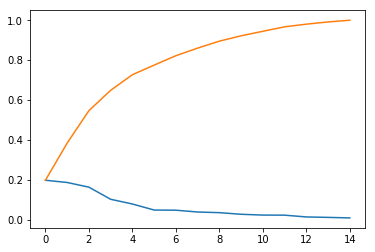

In [231]:
x_train, x_test = forest_decomposition(x_train,x_test,y_train,n_components=3)
print(x_train.shape)
print(x_train)

# PCAによる次元圧縮

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train,y_train)
print(pca.explained_variance_ratio_)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print(x_train.shape)
print(x_train)

[ 0.93015764  0.06984236]
(623, 2)
[[ -5.21992052  21.67574017]
 [ 44.89083361  17.97444368]
 [ 13.59941096 -29.43064452]
 ..., 
 [-24.71740219   1.30580807]
 [-14.85062661   6.91835302]
 [  7.52996583  30.07488324]]


# LDAによる次元圧縮

In [104]:
from sklearn.lda import LDA
lda = LDA(n_components=5)
lda.fit(x_train,y_train)
print(lda.coef_)
x_train = lda.transform(x_train)
x_test = lda.transform(x_test)
print(x_train.shape)
print(x_train)

[[ 0.0102694  -0.01653719]]
(623, 1)
[[ -7.84254708e-01]
 [  3.11666476e-01]
 [  1.19211434e+00]
 [  1.66544903e-01]
 [ -5.37539175e-01]
 [  7.54507309e-01]
 [  4.58369878e+00]
 [ -2.09980199e-01]
 [ -5.17767027e-01]
 [ -3.51736135e-01]
 [ -2.44459262e-01]
 [ -2.50249752e-01]
 [ -3.80292157e-01]
 [ -8.38852445e-02]
 [  3.45562797e-02]
 [ -7.05266287e-01]
 [ -1.87671072e+00]
 [ -3.05480922e-01]
 [ -1.28477172e-01]
 [  1.28733102e-01]
 [ -1.08247269e+00]
 [  3.83450353e-01]
 [ -4.13678803e-01]
 [ -3.72349972e-01]
 [ -3.72944844e-01]
 [ -1.35099456e-01]
 [ -2.28235986e-01]
 [ -4.37094759e-01]
 [ -6.01237587e-01]
 [ -9.50367659e-01]
 [ -6.00544840e-01]
 [ -5.39680221e-01]
 [  2.29272968e-01]
 [ -2.32892346e-01]
 [ -2.70053636e-01]
 [  8.14831785e-01]
 [  5.51197068e-02]
 [ -2.46084698e-01]
 [ -8.27265104e-01]
 [  7.18452628e-01]
 [ -1.08267638e+00]
 [ -3.97816970e-01]
 [ -5.39680221e-01]
 [ -3.48780543e-01]
 [ -1.81040618e-01]
 [ -5.34185572e-01]
 [ -2.90521507e-01]
 [ -2.98145347e-01]
 [ 

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

depth_ls = [17,25,30]
sub_sample_ls = [0.7,0.8,0.9]
lng_ls = [0.01,0.025,0.05,0.1]
gamma_ls = [0.05,0.1,0.3,0.5,0.7,0.9]
alpha_ls = [0.1,0.5,1.0]
lambda_ls = [0.01,0.1,1.0]
lgb_params = {
    "max_depth":depth_ls,"subsample":sub_sample_ls,
    "learning_rate":lng_ls,"min_split_gain":gamma_ls,
    "lambda_l1":alpha_ls,"lambda_l2":lambda_ls}
pen_ls = ["l1","l2"]
c_ls = [0.001,0.01,0.1,1,10,100]
lr_params = {"penalty":pen_ls,"C":c_ls}
svc_params = {"C":c_ls}
est_ls = [10,15,20,25,30]
forest_params = {"max_depth":depth_ls,"n_estimators":est_ls}

gs = GridSearchCV(estimator=gbm,param_grid=lgb_params,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
#gs1 = GridSearchCV(estimator=lr,param_grid=lr_params,n_jobs=-1,verbose=1)
#gs1.fit(x_train,y_train)
gs2 = GridSearchCV(estimator=svc,param_grid=svc_params,n_jobs=-1,verbose=1)
gs2.fit(x_train,y_train)
#gs3 = GridSearchCV(estimator=forest,param_grid=forest_params,n_jobs=-1,verbose=1)
#gs3.fit(x_train,y_train)

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\User\Documents\anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...nda\\lib\\site-packages\\ipykernel\\__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\User\Documents\anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x000001F6A5909D20, fil...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...nda\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\U...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...nda\\lib\\site-packages\\ipykernel\\__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001F6A5909D20, fil...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...nda\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\U...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-12-13T23:15:35.495634', 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'session': '5F908E8D75DF463DB2C3832372E85A74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'5F908E8D75DF463DB2C3832372E85A74']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-12-13T23:15:35.495634', 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'session': '5F908E8D75DF463DB2C3832372E85A74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'5F908E8D75DF463DB2C3832372E85A74'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-12-13T23:15:35.495634', 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'session': '5F908E8D75DF463DB2C3832372E85A74', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8829B024478F49D6865AD3B27C87AABD', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.grid_search import GridSearchCV\nfro...ms,n_jobs=-1,verbose=1)\n#gs3.fit(x_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-30-ba3fe8f5f299>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1f6b2741390, executio..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001F6B2725780, file "<ipython-input-30-ba3fe8f5f299>", line 23>
        result = <ExecutionResult object at 1f6b2741390, executio..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001F6B2725780, file "<ipython-input-30-ba3fe8f5f299>", line 23>, result=<ExecutionResult object at 1f6b2741390, executio..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001F6B2725780, file "<ipython-input-30-ba3fe8f5f299>", line 23>
        self.user_global_ns = {'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', 'import numpy as np\nimport pandas as pd\n\ndf=pd.read_csv("train.csv")\ndf', 'df.isnull().sum()', 'from sklearn.preprocessing import LabelEncoder\nl...Encoder()\ndf.ix[:,4]=le.fit_transform(df.ix[:,4])', 'df["Embarked"]=df["Embarked"].map({"S":1,"Q":2,"C":3})\ndf.head()', 'def name_classifier(name_df):    \n    name_class...nore_index=True)        \n    return name_class_df', 'ss=name_classifier(df["Name"])\n#ss=pd.DataFrame(...=pd.merge(df,ss,right_index=True,left_index=True)', 'def sum_maker(x,y):\n    sums=pd.DataFrame(column...=sums.append(s,ignore_index=True)\n    return sums', 'sums=sum_maker(df["SibSp"].values,df["Parch"].va...,sums,right_index=True,left_index=True)\ndf.head()', 'df["isalone"] = df["SUM"].apply(lambda x: 1 if x == 0 else 0)\ndf.head()', 'def name(x):\n    namesum1=[]\n    namesum={}\n    ...,columns=["myoji","namesum"])\n    return namesum3', 'namesum=name(df["Name"])\ndf=pd.merge(df,namesum,right_index=True,left_index=True)', 's=pd.get_dummies(df["Embarked"])\ndf=pd.merge(df,s,left_index=True,right_index=True)', 'print(df.columns)\nprint(len(df.columns))\nprint(df.head(5))', 'a = [\'Pclass\', \'Sex\', \'Age\', \'Fare\',\'miss\',\'mrs\',\'master\',\'mr\', \'SUM\',\n       "Embarked","isalone"]', 'df2 = df\ndf = df2.ix[:,a]', 'df.head(10)', 'from sklearn.preprocessing import Imputer\nimr1=I...ter"]==1]=imr4.fit_transform(df[df["master"]==1])', 'imr=Imputer(missing_values="NaN",strategy="mean"...e(imr.transform(df),columns=a)\nprint(df.head(20))', '#df2 = df\nprint(df.head(10))\ndf["Categorical_Age...f["Age"],5)\nprint(df["Categorical_Age"].head(30))', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:      PassengerId  Survived  Pclass  \
0         ...         NaN       2.0  

[891 rows x 12 columns], 2: PassengerId      0
Survived         0
Pclass    ...abin          687
Embarked         2
dtype: int64, 4:    PassengerId  Survived  Pclass  \
0           ...  
4            373450   8.0500   NaN       1.0  , 8:    PassengerId  Survived  Pclass  \
0           ...00   NaN       1.0   0.0  0.0     0.0  1.0  0.0  , 9:    PassengerId  Survived  Pclass  \
0           ...       0  
2        1  
3        0  
4        1  , 16:    Pclass  Sex       Age     Fare  miss  mrs  ma...       1  
7        0  
8        0  
9        0  , 23: 0      0
1      1
2      1
3      1
4      0
5  ... 0
889    1
890    0
Name: Survived, dtype: int64, 25:    Pclass  Sex  Age  Fare  miss  mrs  master   m...512.329]  
4  (32.252, 48.168]   (7.91, 14.454]  }, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'VotingClassifier': <class 'sklearn.ensemble.voting_classifier.VotingClassifier'>, ...}
        self.user_ns = {'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', 'import numpy as np\nimport pandas as pd\n\ndf=pd.read_csv("train.csv")\ndf', 'df.isnull().sum()', 'from sklearn.preprocessing import LabelEncoder\nl...Encoder()\ndf.ix[:,4]=le.fit_transform(df.ix[:,4])', 'df["Embarked"]=df["Embarked"].map({"S":1,"Q":2,"C":3})\ndf.head()', 'def name_classifier(name_df):    \n    name_class...nore_index=True)        \n    return name_class_df', 'ss=name_classifier(df["Name"])\n#ss=pd.DataFrame(...=pd.merge(df,ss,right_index=True,left_index=True)', 'def sum_maker(x,y):\n    sums=pd.DataFrame(column...=sums.append(s,ignore_index=True)\n    return sums', 'sums=sum_maker(df["SibSp"].values,df["Parch"].va...,sums,right_index=True,left_index=True)\ndf.head()', 'df["isalone"] = df["SUM"].apply(lambda x: 1 if x == 0 else 0)\ndf.head()', 'def name(x):\n    namesum1=[]\n    namesum={}\n    ...,columns=["myoji","namesum"])\n    return namesum3', 'namesum=name(df["Name"])\ndf=pd.merge(df,namesum,right_index=True,left_index=True)', 's=pd.get_dummies(df["Embarked"])\ndf=pd.merge(df,s,left_index=True,right_index=True)', 'print(df.columns)\nprint(len(df.columns))\nprint(df.head(5))', 'a = [\'Pclass\', \'Sex\', \'Age\', \'Fare\',\'miss\',\'mrs\',\'master\',\'mr\', \'SUM\',\n       "Embarked","isalone"]', 'df2 = df\ndf = df2.ix[:,a]', 'df.head(10)', 'from sklearn.preprocessing import Imputer\nimr1=I...ter"]==1]=imr4.fit_transform(df[df["master"]==1])', 'imr=Imputer(missing_values="NaN",strategy="mean"...e(imr.transform(df),columns=a)\nprint(df.head(20))', '#df2 = df\nprint(df.head(10))\ndf["Categorical_Age...f["Age"],5)\nprint(df["Categorical_Age"].head(30))', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:      PassengerId  Survived  Pclass  \
0         ...         NaN       2.0  

[891 rows x 12 columns], 2: PassengerId      0
Survived         0
Pclass    ...abin          687
Embarked         2
dtype: int64, 4:    PassengerId  Survived  Pclass  \
0           ...  
4            373450   8.0500   NaN       1.0  , 8:    PassengerId  Survived  Pclass  \
0           ...00   NaN       1.0   0.0  0.0     0.0  1.0  0.0  , 9:    PassengerId  Survived  Pclass  \
0           ...       0  
2        1  
3        0  
4        1  , 16:    Pclass  Sex       Age     Fare  miss  mrs  ma...       1  
7        0  
8        0  
9        0  , 23: 0      0
1      1
2      1
3      1
4      0
5  ... 0
889    1
890    0
Name: Survived, dtype: int64, 25:    Pclass  Sex  Age  Fare  miss  mrs  master   m...512.329]  
4  (32.252, 48.168]   (7.91, 14.454]  }, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'VotingClassifier': <class 'sklearn.ensemble.voting_classifier.VotingClassifier'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
C:\Users\User\Documents\titanic\<ipython-input-30-ba3fe8f5f299> in <module>()
     18 svc_params = {"C":c_ls}
     19 est_ls = [10,15,20,25,30]
     20 forest_params = {"max_depth":depth_ls,"n_estimators":est_ls}
     21 
     22 gs = GridSearchCV(estimator=gbm,param_grid=lgb_params,n_jobs=-1,verbose=1)
---> 23 gs.fit(x_train,y_train)
     24 #gs1 = GridSearchCV(estimator=lr,param_grid=lr_params,n_jobs=-1,verbose=1)
     25 #gs1.fit(x_train,y_train)
     26 gs2 = GridSearchCV(estimator=svc,param_grid=svc_params,n_jobs=-1,verbose=1)
     27 gs2.fit(x_train,y_train)

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...='2*n_jobs', refit=True, scoring=None, verbose=1), X=     Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns], y=857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64)
    824         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    825             Target relative to X for classification or regression;
    826             None for unsupervised learning.
    827 
    828         """
--> 829         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=1)>
        X =      Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns]
        y = 857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64
        self.param_grid = {'lambda_l1': [0.1, 0.5, 1.0], 'lambda_l2': [0.01, 0.1, 1.0], 'learning_rate': [0.01, 0.025, 0.05, 0.1], 'max_depth': [17, 25, 30], 'min_split_gain': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9], 'subsample': [0.7, 0.8, 0.9]}
    830 
    831 
    832 class RandomizedSearchCV(BaseSearchCV):
    833     """Randomized search on hyper parameters.

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...='2*n_jobs', refit=True, scoring=None, verbose=1), X=     Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns], y=857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Dec 13 23:15:38 2017
PID: 6212         Python 3.6.0: C:\Users\User\Documents\anaconda\python.exe
...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False),      Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns], 857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64, <function _passthrough_scorer>, array([196, 199, 200, 204, 206, 207, 209, 210, 2...13, 614, 615, 616, 617, 618, 619, 620, 621, 622]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 202, 203, 205, 208, 214, 218, 221, 222, 229]), 1, {'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.01, 'max_depth': 17, 'min_split_gain': 0.05, 'subsample': 0.7}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False),      Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns], 857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64, <function _passthrough_scorer>, array([196, 199, 200, 204, 206, 207, 209, 210, 2...13, 614, 615, 616, 617, 618, 619, 620, 621, 622]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 202, 203, 205, 208, 214, 218, 221, 222, 229]), 1, {'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.01, 'max_depth': 17, 'min_split_gain': 0.05, 'subsample': 0.7}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False), X=     Pclass  Sex  Age  Fare  isalone  Embarked
8...   3.0      0.0       1.0

[623 rows x 6 columns], y=857    1
52     1
386    0
124    0
578    0
549... 0
559    1
684    0
Name: Survived, dtype: int64, scorer=<function _passthrough_scorer>, train=array([196, 199, 200, 204, 206, 207, 209, 210, 2...13, 614, 615, 616, 617, 618, 619, 620, 621, 622]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 202, 203, 205, 208, 214, 218, 221, 222, 229]), verbose=1, parameters={'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.01, 'max_depth': 17, 'min_split_gain': 0.05, 'subsample': 0.7}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1649     fit_params = fit_params if fit_params is not None else {}
   1650     fit_params = dict([(k, _index_param_value(X, v, train))
   1651                       for k, v in fit_params.items()])
   1652 
   1653     if parameters is not None:
-> 1654         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Gradie...     subsample=1.0, verbose=0, warm_start=False)>
        parameters = {'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.01, 'max_depth': 17, 'min_split_gain': 0.05, 'subsample': 0.7}
   1655 
   1656     start_time = time.time()
   1657 
   1658     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\base.py in set_params(self=GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False), **params={'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.01, 'max_depth': 17, 'min_split_gain': 0.05, 'subsample': 0.7})
    286                 # simple objects case
    287                 if key not in valid_params:
    288                     raise ValueError('Invalid parameter %s for estimator %s. '
    289                                      'Check the list of available parameters '
    290                                      'with `estimator.get_params().keys()`.' %
--> 291                                      (key, self.__class__.__name__))
        key = 'lambda_l1'
        self.__class__.__name__ = 'GradientBoostingClassifier'
    292                 setattr(self, key, value)
    293         return self
    294 
    295     def __repr__(self):

ValueError: Invalid parameter lambda_l1 for estimator GradientBoostingClassifier. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [466]:
def mk_clf(x_train,y_train,*clfs):
    if len(clfs) > 1:
        clf_ls = []
        for clf in clfs:
            clf_ls.append((str(clf),clf))
        new_clf = VotingClassifier(estimators=clf_ls,n_jobs=-1,voting="soft")
    else:
        new_clf = clfs[0]
    new_clf.fit(x_train,y_train)
    print(accuracy_score(y_true=y_train,y_pred=new_clf.predict(x_train)))
    print(accuracy_score(y_true=y_test,y_pred=new_clf.predict(x_test)))
    return new_clf

In [31]:
from light
lgb.get_param().keys()

NameError: name 'lgb' is not defined

In [467]:
new_clf = mk_clf(x_train,y_train,gs,gs2)

0.829855537721
0.817164179104


In [441]:
print(type(new_clf))
x_train.head(5)
x_train = x_train.astype(int)
x_train

<class 'sklearn.ensemble.voting_classifier.VotingClassifier'>


,Pclass,Sex,Age,Fare,isalone,Embarked
857,1,1,3,2,1,1
52,1,0,3,3,0,3
386,3,1,0,3,0,1
124,1,1,3,3,0,1
578,3,0,2,2,0,3
549,2,1,0,3,0,1
118,1,1,1,3,0,3
12,3,1,1,1,1,1
157,3,1,1,1,1,1
127,3,1,1,0,1,1


In [398]:
#new_clf2 = VotingClassifier(estimators=[("gs",gs),("gs1",gs1),("gs2",gs2)],n_jobs=-1,voting="soft")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator =new_clf,X=x_train,y=y_train,cv=5,n_jobs=-1,verbose=1)
print(scores)
print(np.mean(scores),"+/-",np.std(scores))

[ 0.86143187  0.86374134  0.88452656  0.86805556  0.85416667]
0.866384398255 +/- 0.0101263716459


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


In [468]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]

#df3["Cabin"] = cabin_cha(df3["Cabin"].values)
#s = pd.get_dummies(df3["Cabin"])
#df3 = pd.merge(df3,s,left_index=True, right_index=True)

df3["child"]=df3["Age"].apply(lambda x:1 if x < 15 else 0)
df3["Embarked"]=df3["Embarked"].map({"S":1,"Q":2,"C":3})

ss=name_classifier(df3["Name"])
ss=pd.DataFrame(ss.values,index=range(418),columns=["miss","mrs","master","mr"])
df4=pd.merge(df3,ss,right_index=True,left_index=True)

sums=sum_maker(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)

df4["isalone"] = df4["SUM"].apply(lambda x:1 if x == 0 else 0)
#namesums=name(df4["Name"])
#df4=pd.merge(df4,namesums,right_index=True,left_index=True)

df4["Sex"]=le.transform(df4["Sex"])


#s1=pd.get_dummies(df4["Embarked"])
#df4=pd.merge(df4,s1,right_index=True,left_index=True)
print(df4.head())
df4=df4.ix[:,a]

df4[df4["miss"]==1]=imr1.transform(df4[df4["miss"]==1])
df4[df4["mr"]==1]=imr2.transform(df4[df4["mr"]==1])
df4[df4["mrs"]==1]=imr3.transform(df4[df4["mrs"]==1])
df4[df4["master"]==1]=imr4.transform(df4[df4["master"]==1])
df4 = pd.DataFrame(imr.transform(df4.values),columns=a)

df4.ix[df4["Age"] < 16.336,"Age"] = 0
df4.ix[(df4["Age"] < 32.252) & (df4["Age"] >= 16.336),"Age"] = 1
df4.ix[(df4["Age"] < 48.168) & (df4["Age"] >= 32.252),"Age"] = 2
df4.ix[(df4["Age"] < 64.084) & (df4["Age"] >= 48.168),"Age"] = 3
df4.ix[df4["Age"] >= 64.084,"Age"] = 4

df4.ix[df4["Fare"] < 7.91,"Fare"] = 0
df4.ix[(df4["Fare"] < 14.454) & (df4["Fare"] >= 7.91),"Fare"] = 1
df4.ix[(df4["Fare"] < 31) & (df4["Fare"] >= 14.454),"Fare"] = 2
df4.ix[df4["Fare"] >= 31,"Fare"] = 3

#df4["Fare"] = sc1.transform(df4["Fare"])
#df4["SibSp"] = sc2.transform(df4["SibSp"])
#df4["Parch"] = sc3.transform(df4["Parch"])
#df4["Age"] = sc4.transform(df4["Age"])

df4=pd.DataFrame(imr.transform(df4),columns=a)
#pd.DataFrame(a)
x_te=df4.ix[:,b].astype(int)
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  child  miss  mrs  \
0  34.5      0      0   330911   7.8292   NaN         2      0   0.0  0.0   
1  47.0      1      0   363272   7.0000   NaN         1      0   0.0  1.0   
2  62.0      0      0   240276   9.6875   NaN         2      0   0.0  0.0   
3  27.0      0      0   315154   8.6625   NaN         1      0   0.0  0.0   
4  22.0      1      1  3101298  12.2875   NaN         1      0   0.0  1.0   

   master   mr  SUM  isalone  
0     0.0  1.0  0.0        1  
1     0.0  0

,Pclass,Sex,Age,Fare,isalone,Embarked
0,3,1,2,0,1,2
1,3,0,2,0,0,1
2,2,1,3,1,1,2
3,3,1,1,1,1,1
4,3,0,1,1,0,1
5,3,1,0,1,1,1
6,3,0,1,0,1,2
7,2,1,1,2,0,1
8,3,0,1,0,1,3
9,3,1,1,2,0,1


In [469]:
print(x_train.columns)
print(x_te.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'isalone', 'Embarked'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'isalone', 'Embarked'], dtype='object')


In [470]:
print(x_te.isnull().sum())

Pclass      0
Sex         0
Age         0
Fare        0
isalone     0
Embarked    0
dtype: int64


In [471]:
y_pred=new_clf.predict(x_te)
len(y_pred)

418

In [472]:
zip_data = zip(df3.ix[:,0].astype(int), y_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y_pred.astype(int)):
        writer.writerow([pid, survived])

## メモ

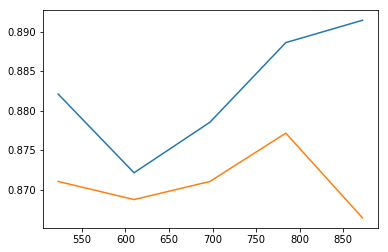

In [136]:
%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
training_sizes, train_scores, test_scores = \
    learning_curve(new_clf,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()

In [108]:
memo_df = pd.read_csv("test.csv")
print(memo_df.shape)
print(memo_df.isnull().sum())

(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


          PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch  \
Embarked                                                               
C               74820        93     317   95   4005.92     65     61   
Q               32178        30     224   41    786.50     33     13   
S              289496       217    1514  441  16312.75    368    266   

                Fare  child  
Embarked                     
C         10072.2962     15  
Q          1022.2543      4  
S         17439.3988     59  


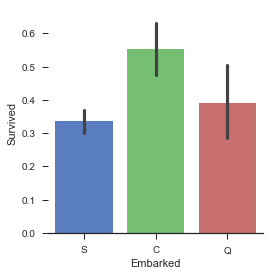

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(df.groupby("Embarked").sum())
sns.set(style="ticks")
g = sns.factorplot(x="Embarked",y="Survived",kind="bar",data=df,palette="muted")
g.despine(left=True)

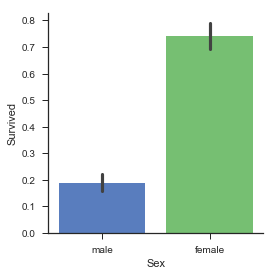

In [81]:
t = sns.factorplot(x="Sex",y="Survived",kind="bar",palette="muted",data=df)

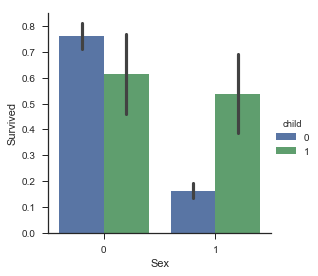

In [90]:
t = sns.factorplot(x="Sex",y="Survived",hue="child",data=df,kind="bar")